<a href="https://colab.research.google.com/github/stillrahim/jupyter-exploration/blob/main/L04_Ibrahim_Bah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lab 03 – Option B
## Focused Image Classification with SVM
**Name:** Ibrahim Bah
**Course:** ITAI 1378

---

### Objective
In this lab, I will:
- Build an image classification system using SVM.
- Experiment with different kernels and hyperparameters.
- Optimize performance through systematic tuning.
- Reflect on the outcomes.


SyntaxError: invalid syntax (ipython-input-2870179250.py, line 3)

In [2]:
# --- Setup ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset (digits for simplicity)
digits = datasets.load_digits()

X = digits.images.reshape((len(digits.images), -1))
y = digits.target

print("Dataset shape:", X.shape)
print("Number of classes:", len(np.unique(y)))


Dataset shape: (1797, 64)
Number of classes: 10


In [3]:
# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Training size: 1437
Test size: 360


In [4]:
# --- Baseline SVM (linear kernel) ---
linear_svm = SVC(kernel="linear", random_state=42)
linear_svm.fit(X_train, y_train)

y_pred_linear = linear_svm.predict(X_test)

print("Classification Report (Linear SVM):")
print(classification_report(y_test, y_pred_linear))


Classification Report (Linear SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.89      0.91        35
           9       0.95      1.00      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [5]:
# --- Try different kernels ---
kernels = ["linear", "poly", "rbf", "sigmoid"]
results = {}

for k in kernels:
    svm = SVC(kernel=k, random_state=42)
    svm.fit(X_train, y_train)
    acc = svm.score(X_test, y_test)
    results[k] = acc

results


{'linear': 0.9777777777777777,
 'poly': 0.9861111111111112,
 'rbf': 0.9916666666666667,
 'sigmoid': 0.8861111111111111}

In [6]:
# --- Hyperparameter tuning (RBF kernel) ---
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.01, 0.001],
    "kernel": ["rbf"]
}

grid = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("Classification Report (Best RBF SVM):")
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Score: 0.9888656924147531
Classification Report (Best RBF SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.97      0.97      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



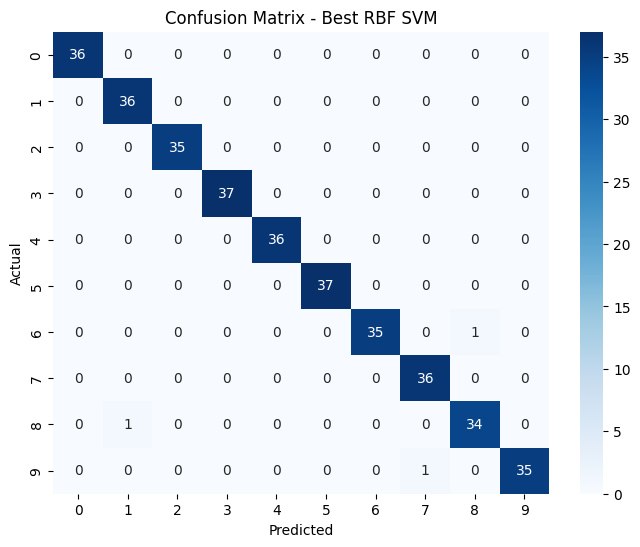

In [7]:
# --- Confusion Matrix ---
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Best RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
